# 입문자를 위한, 파이썬/R 데이터 분석

## Today's mission

- 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석
- 워드클라우드 : soynlp 라이브러리 활용 명사 추출

## 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석

참고 : 다음 뉴스 사이트 기사목록 크롤링 및 텍스트 분석

In [1]:
#!pip install konlpy
#!pip install wordcloud

- [KoNLPy를 위한 자바 설치](https://www.codeit.kr/tutorials/43/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-Windows)

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

- 검색어 및 검색페이지 수 입력

In [3]:
# 검색어 입력
keyword = input("검색어를 입력하세요.")

검색어를 입력하세요.혹성탈출


In [4]:
# 검색페이지 입력
lastpage = int(input("마지막 페이지 번호를 입력하세요."))

마지막 페이지 번호를 입력하세요.20


- 다음 뉴스 검색 : 상기 검색어 및 페이지수 활용

In [5]:
titleList = []

for i in range(1, lastpage+1, 1) :
    #url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[{i}]"
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={keyword}&p={i}"
    print(url)
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("ul.c-list-basic")
    #subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        #print(titleText)
        titleList.append(titleText) # titleList에 추가
    
    time.sleep(10)

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=1
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=2
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=3
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=4
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=5
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=6
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=7
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=8
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=혹성탈출&p=9
https://search.daum.net/search?w=news&nil_search=btn&DA

In [6]:
titleList[0]

'            쿠키뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기           2         영상미는 경이롭지만…‘혹성탈출: 새로운 시대’ [쿡리뷰]       영화 ‘혹성탈출: 새로운 시대’ 스틸컷. 월트디즈니 컴퍼니 코리아 먼 미래 지구는 유인원의 차지다. 인류 대부분은 퇴화해 원시인으로 회귀한 지 오래다. 유인원은 진화를 거듭해 언어를 습득하고 부족을 꾸려 생존한다. 이 가운데 침팬지 노아(오웬 티그)는...    2024.05.08                 서울신문       개별문서메뉴  톡으로 바로 공유 공유하기           7         전복과 저항의 알레고리…원작으로 톺아보는 ‘혹성탈출’ 세계관       ‘혹성탈출: 새로운 시대’ 스틸컷. 왼쪽부터 주인공 노아와 인간 소녀 메이, 오랑우탄 유인원 라카. 월트디즈니컴퍼니 제공 반세기 전 출간된 짤막한 소설 한 권에서 무려 10편의 영화가 탄생했다. 프랑스 SF작가 피에르 불(1912~1994)의 1963년작 ‘혹성탈출...    3시간전                 연합뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                 \'혹성탈출 4\' 개봉 첫 주 전세계 1천771억원 수입…"기대 이상"       영화 \'혹성탈출: 새로운 시대\' 속 한 장면 [로스앤젤레스=연합뉴스. 월트디즈니컴퍼니 코리아 제공. 재판매 및 DB 금지] (로스앤젤레스=연합뉴스) 임미나 특파원 = 월트디즈니컴퍼니(이하 디즈니)의 올해 북미 지역 첫 극장 개봉작인 \'혹성탈출: 새로운 시대\'(이하...    8시간전                  KBS   5시간전    ‘혹성탈출 4’ 개봉 첫 주 전세계 1,771억원 수입…“기대 이상”               한국경제TV   8시간전    \'혹성탈출 4\' 개봉 첫 주에만 전세계 1천771억원 수입               중앙일보   6시간전    혹성탈출4, 기대 이상 흥

In [7]:
# 한글만 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [8]:
text_cleaning(titleList[0])

'            쿠키뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                    영상미는 경이롭지만혹성탈출 새로운 시대 쿡리뷰       영화 혹성탈출 새로운 시대 스틸컷 월트디즈니 컴퍼니 코리아 먼 미래 지구는 유인원의 차지다 인류 대부분은 퇴화해 원시인으로 회귀한 지 오래다 유인원은 진화를 거듭해 언어를 습득하고 부족을 꾸려 생존한다 이 가운데 침팬지 노아오웬 티그는                     서울신문       개별문서메뉴  톡으로 바로 공유 공유하기                    전복과 저항의 알레고리원작으로 톺아보는 혹성탈출 세계관       혹성탈출 새로운 시대 스틸컷 왼쪽부터 주인공 노아와 인간 소녀 메이 오랑우탄 유인원 라카 월트디즈니컴퍼니 제공 반세기 전 출간된 짤막한 소설 한 권에서 무려 편의 영화가 탄생했다 프랑스 작가 피에르 불의 년작 혹성탈출    시간전                 연합뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                 혹성탈출  개봉 첫 주 전세계 천억원 수입기대 이상       영화 혹성탈출 새로운 시대 속 한 장면 로스앤젤레스연합뉴스 월트디즈니컴퍼니 코리아 제공 재판매 및  금지 로스앤젤레스연합뉴스 임미나 특파원  월트디즈니컴퍼니이하 디즈니의 올해 북미 지역 첫 극장 개봉작인 혹성탈출 새로운 시대이하    시간전                     시간전    혹성탈출  개봉 첫 주 전세계 억원 수입기대 이상               한국경제   시간전    혹성탈출  개봉 첫 주에만 전세계 천억원 수입               중앙일보   시간전    혹성탈출 기대 이상 흥행개봉 첫 주 전세계 억 수입       이전 컨텐츠보기 다음 컨텐츠보기                오마이뉴스       개별문서메뉴  톡으로 바로 공유 공유하기                    편의 저주 벗어나지 못한 혹성탈출 공은 속편

- [map 과 lambda 참고](https://wikidocs.net/32#map)

In [9]:
# 전처리 : 한글만 추출
titleList = list(map(lambda x:text_cleaning(x), titleList))

In [26]:
titleList[0]

'            쿠키뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                    영상미는 경이롭지만혹성탈출 새로운 시대 쿡리뷰       영화 혹성탈출 새로운 시대 스틸컷 월트디즈니 컴퍼니 코리아 먼 미래 지구는 유인원의 차지다 인류 대부분은 퇴화해 원시인으로 회귀한 지 오래다 유인원은 진화를 거듭해 언어를 습득하고 부족을 꾸려 생존한다 이 가운데 침팬지 노아오웬 티그는                     서울신문       개별문서메뉴  톡으로 바로 공유 공유하기                    전복과 저항의 알레고리원작으로 톺아보는 혹성탈출 세계관       혹성탈출 새로운 시대 스틸컷 왼쪽부터 주인공 노아와 인간 소녀 메이 오랑우탄 유인원 라카 월트디즈니컴퍼니 제공 반세기 전 출간된 짤막한 소설 한 권에서 무려 편의 영화가 탄생했다 프랑스 작가 피에르 불의 년작 혹성탈출    시간전                 연합뉴스   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                 혹성탈출  개봉 첫 주 전세계 천억원 수입기대 이상       영화 혹성탈출 새로운 시대 속 한 장면 로스앤젤레스연합뉴스 월트디즈니컴퍼니 코리아 제공 재판매 및  금지 로스앤젤레스연합뉴스 임미나 특파원  월트디즈니컴퍼니이하 디즈니의 올해 북미 지역 첫 극장 개봉작인 혹성탈출 새로운 시대이하    시간전                     시간전    혹성탈출  개봉 첫 주 전세계 억원 수입기대 이상               한국경제   시간전    혹성탈출  개봉 첫 주에만 전세계 천억원 수입               중앙일보   시간전    혹성탈출 기대 이상 흥행개봉 첫 주 전세계 억 수입       이전 컨텐츠보기 다음 컨텐츠보기                오마이뉴스       개별문서메뉴  톡으로 바로 공유 공유하기                    편의 저주 벗어나지 못한 혹성탈출 공은 속편

- 텍스트 전처리 : 명사의 빈도수 계산

In [11]:
# 텍스트 전처리
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)

In [12]:
nouns[:10]

['쿠키뉴스', '언론사', '픽', '개별', '문서', '메뉴', '톡', '바로', '공유', '공유']

In [13]:
count = Counter(nouns) # 각 명사의 빈도수 계산

In [14]:
# 각 명사의 빈도수 계산
count

Counter({'쿠키뉴스': 2,
         '언론사': 26,
         '픽': 26,
         '개별': 200,
         '문서': 204,
         '메뉴': 200,
         '톡': 200,
         '바로': 202,
         '공유': 400,
         '상미': 2,
         '경': 1,
         '혹성탈출': 610,
         '시대': 331,
         '쿡': 2,
         '리뷰': 6,
         '영화': 198,
         '스틸컷': 10,
         '월트디즈니': 81,
         '컴퍼니': 83,
         '코리아': 79,
         '미래': 7,
         '지구': 1,
         '유인원': 83,
         '차지': 1,
         '인류': 5,
         '대부분': 1,
         '퇴화': 15,
         '원시인': 1,
         '회귀': 1,
         '진화': 34,
         '거듭': 3,
         '언어': 3,
         '습득': 1,
         '부족': 3,
         '생존': 1,
         '이': 18,
         '가운데': 13,
         '침팬지': 4,
         '노아': 17,
         '오웬': 15,
         '티그': 13,
         '서울': 97,
         '신문': 5,
         '전복': 2,
         '저항': 1,
         '알레고리': 1,
         '원작': 4,
         '세계관': 20,
         '왼쪽': 5,
         '주인공': 6,
         '인간': 70,
         '소녀': 5,
         '메이':

- 텍스트 전처리 : 불용어 처리

In [15]:
# 불용어처리명
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})

# 불용어 텍스트 파일 경로
korean_stopwords_path = "data/stopwords-ko.txt"

# 불용어 로드
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 나무위키에서 추가한 불용어
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명',
                       '표기', '추가', '모든', '사용', '매우', '가장', '줄거리',
                       '요소', '상황', '편집', '틀', '경우', '때문', '모습',
                       '정도', '이후', '사실', '생각', '인물', '이름', '년월', '공유', 
                       '메뉴'] ##### 개별적 불용어 추가

# 불용어 추가
stopwords.extend(namu_wiki_stopwords)

# 불용어 처리
remove_char_counter = Counter({x:remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

In [16]:
remove_char_counter

Counter({'쿠키뉴스': 2,
         '언론사': 26,
         '개별': 200,
         '상미': 2,
         '혹성탈출': 610,
         '시대': 331,
         '리뷰': 6,
         '영화': 198,
         '스틸컷': 10,
         '월트디즈니': 81,
         '컴퍼니': 83,
         '코리아': 79,
         '미래': 7,
         '지구': 1,
         '유인원': 83,
         '차지': 1,
         '인류': 5,
         '대부분': 1,
         '퇴화': 15,
         '원시인': 1,
         '회귀': 1,
         '진화': 34,
         '거듭': 3,
         '언어': 3,
         '습득': 1,
         '부족': 3,
         '생존': 1,
         '가운데': 13,
         '침팬지': 4,
         '노아': 17,
         '오웬': 15,
         '티그': 13,
         '서울': 97,
         '신문': 5,
         '전복': 2,
         '저항': 1,
         '알레고리': 1,
         '원작': 4,
         '세계관': 20,
         '왼쪽': 5,
         '주인공': 6,
         '인간': 70,
         '소녀': 5,
         '메이': 2,
         '오랑우탄': 2,
         '라카': 7,
         '제공': 34,
         '반세기': 1,
         '소설': 3,
         '무려': 1,
         '편의': 3,
         '탄생': 7,
         '프랑스': 2

- 텍스트 전처리 : 명사의 분석 대상 갯수 지정

In [17]:
# 빈도수 특정 명사의 갯수 지정
ranked_tags = remove_char_counter.most_common(50) # 빈도순 n개 단어

In [18]:
#ranked_tags

In [19]:
pd.DataFrame(ranked_tags)

,0,1
0,혹성탈출,610
1,시대,331
2,감독,201
3,개별,200
4,영화,198
5,기자,121
6,웨스,108
7,서울,97
8,효과,96
9,컴퍼니,83


- 워드클라우드

In [20]:
####### [WordCloud 오류 해결]
#!pip install --upgrade pip
#!pip install --upgrade Pillow

In [21]:
#remove_char_counter

In [22]:
### 워드클라우드
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

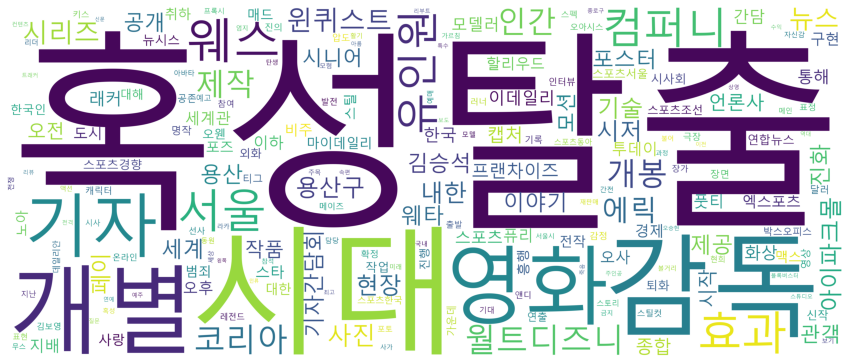

In [23]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wc_{keyword}.png')

In [24]:
### 워드클라우드 상위 N개 대상
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(dict(ranked_tags))

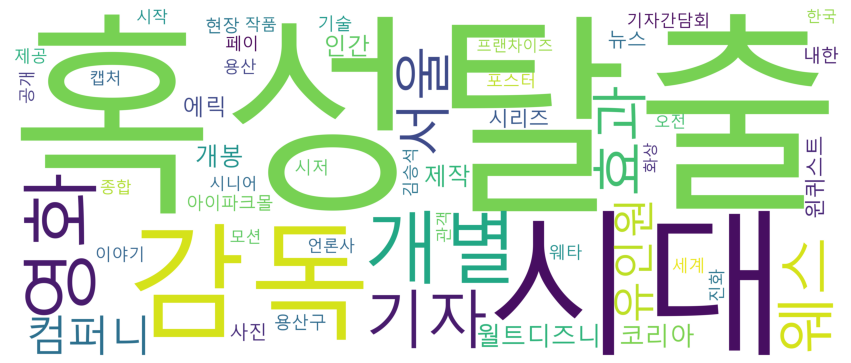

In [25]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wcN_{keyword}.png')